# Assignment 4: Linear Regression and Gradient Descent

Due date: Sunday, Nov. 7 at 11:59 pm

## Collaboration Policy

This is a group assignment. Please list the names of group members below.

**Collaborators**: Gian Nicolas , Ayoub Rammo

## Scoring Breakdown

|Question|Points|
|---|---|
|1.a|10|
|1.b|10|
|2.a|10|
|2.b|10|
|2.c|10|
|2.d|10|
|2.e|10|
|3.a|20|
|3.b|10|
|**Total**|100|

## Question 1. 
Suppose we create a linear model with parameters $\vec{\hat{\beta}}=[\hat{\beta}_0,...,\hat{\beta}_p]$
As we saw in lecture, such a model makes predictions $\hat{y}=\vec{\hat{\beta}}.\vec{x}=\sum{\hat{\beta}_ix_i}$ 


### 1.a. 
Suppose $\vec{\hat{\beta}}=[1,2,1]$ and e receive an observation $x = [4, 2, 1]$. What $\hat{y}$ value will
this model predict for the given observation?

y_hat = 1.4 + 2.2 + 1.1
      = 4 + 4 + 1 
      = 9

### 1.b.
Suppose the correct $y$ was 6.1. What will be the L2 loss for our prediction $\hat{y}$ from question 1.a?

L2 loss = (y - y_hat)^2
        = (6.1 - 9)^2
        = (-2.9)^2
        = 8.41

## Question 2.

The following function generates the dataset you need for the rest of the questions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sfa
import scipy.optimize
from scipy.optimize import minimize

# This function helps generate a synthesized dataset based on a given gamma value
def generate_dataset(gamma, std=1, num_samples=100, with_intercept=True):
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std 
    intercept = -int(with_intercept) * 2
    Y = gamma * X + intercept + e
    #X=X.reshape(-1, 1)
    #Y=Y.reshape(-1, 1)
    data=pd.DataFrame({'X':X, 'Y':Y})
    return data

In [3]:
# Example:
data = generate_dataset(gamma=10)
data

,X,Y
0,0.117599,0.288289
1,0.353596,0.271879
2,0.401430,2.608090
3,0.432439,2.710965
4,0.175950,0.634437
...,...,...
95,0.838990,6.104215
96,0.853022,6.493841
97,0.761242,5.399360
98,0.152848,0.705698


### 2.a.

Using the following functions (gradient descent, mse_loss, and mse_loss_derivative), find the best value of gamma that the gradient descent algorithm can find in 100 iterations for initial gamma=0.1 and $\alpha=0.01$. 

In [4]:
x=data['X']
y_obs=data['Y']
    
def gradient_descent(df, initial_guess, alpha, n):
    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - alpha * df(guess)
        guesses.append(guess)
    return np.array(guesses)

def mse_loss(gamma):
    y_hat = gamma * x
    return np.mean((y_hat - y_obs) ** 2)  

def mse_loss_derivative(gamma):
    y_hat = gamma * x
    return np.mean(2 * (y_hat - y_obs) * x)


In [5]:
guesses=gradient_descent(mse_loss_derivative, 0.1, 0.01, 100) 
loss=[] 
for i in guesses: #Iterating guesses list
  loss.append(mse_loss(i)) #
minpos = loss.index(min(loss)) #Finding position of minimum loss
print("Minimum loss = ",min(loss),' at best guess = ',guesses[minpos])


Minimum loss =  6.301348342083584  at best guess =  3.0919335766727913


### 2.b.
Create a plot below showing the fitted simple linear regression model on the observed data for when you pick the gamma selected by the above algorithm. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

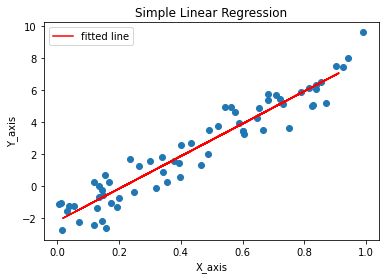

In [6]:
x = data["X"].values
y = data["Y"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

x_test = x_test.reshape(-1, 1)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test).reshape(-1, 1)
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color = "red")
plt.xlabel("X_axis")
plt.ylabel("Y_axis")
 
plt.legend(['fitted line'])

plt.title("Simple Linear Regression")
plt.show()


### 2.c.

Use a different value of $\alpha=0.1$ and repeat 2.a and 2.b.


Minimum loss =  2.3420662703975594  at best guess =  6.687402656079934


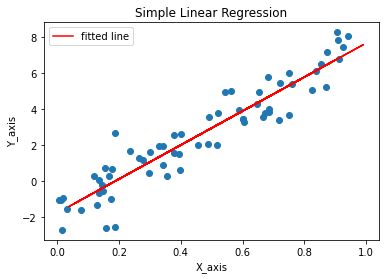

In [14]:
guesses=gradient_descent(mse_loss_derivative, 0.1, 0.1, 100) 
loss=[] 
for i in guesses: #Iterating guesses list
  loss.append(mse_loss(i)) #
minpos = loss.index(min(loss)) #Finding position of minimum loss
print("Minimum loss = ",min(loss),' at best guess = ',guesses[minpos])

#Plot
x = data["X"].values
y = data["Y"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

x_test = x_test.reshape(-1, 1)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test).reshape(-1, 1)
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color = "red")
plt.xlabel("X_axis")
plt.ylabel("Y_axis")
 
plt.legend(['fitted line'])

plt.title("Simple Linear Regression")
plt.show()

### 2.d.
Which value of $\alpha$ resulted in a better model? Why? 

𝛼 = 0.1 resulted in a better model because it leads to a smaller minimum loss. 

## 2.e.

What other inputs of the gradient_descent function can we change to imporove the model?

We can run the gradient descent update for a finite number of iterations and static learning rate. 
Here, we use gradient and alpha to update our current beta. 
def gradient_descent(loss_f, df, beta, alpha, n): 
,where loss_f is the loss function to be minimized.
Beta is the vector of values beta to use at first iteration. 

## Question 3.

### 3.a. 
Write a calculate_y_hat(X, Y, with_intercept) function that computes the value of y_hat for your model based on whether or not an intercept term is specified within the model.

Hint: Use sklearn.linear_model.LinearRegression library

In [96]:
import seaborn as sns

model = LinearRegression()

def calculate_y_hat(X,Y, model):
    model.fit(X,Y)
    Y_hat = model.intercept_ + model.coef_ * data["X"]
    return Y_hat


### 3.b.

Create a plot below comparing our fitted simple linear regression model on the observed data for when it includes an intercept v.s. when it does not include an intercept. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- A line plot for the simple linear regression model with an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

You should use different colors for the two line plots

C:\Users\tdphu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


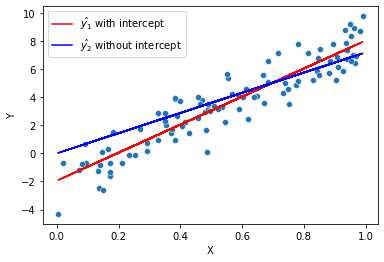

In [105]:

sns.scatterplot(data["X"], data["Y"])
model_1 = LinearRegression(fit_intercept = True)
model_2 = LinearRegression(fit_intercept = False)
X_1 = data[["X"]]
X_2 = data[["X"]]
y = data["Y"]
y_hat_1 = calculate_y_hat(X_1,y, model_1)
y_hat_2 = calculate_y_hat(X_2,y, model_2)
plt.plot(X_1, y_hat_1, 'r', label= "$\hat{y_1}$ with intercept")
plt.plot(X_2, y_hat_2, 'b', label= "$\hat{y_2}$ without intercept")
plt.legend(loc="upper left")